In [2]:
import os
import sys
from pathlib import Path

sys.path.append(str(Path().resolve().parent))
sys.path.append(str(Path().resolve().parent.parent))

import numpy as np
import pandas as pd
import json

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point

In [3]:
path = "/home/mila/t/tengmeli/ecosystem-embedding/hotspots_june_filtered.csv"

df = pd.read_csv(path)
df = df.drop_duplicates("hotspot_id")

In [4]:
geoDatav = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson')

In [5]:
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)   


In [6]:
train = pd.read_csv("/network/projects/_groups/ecosystem-embeddings/hotspot_split_june/train_june_vf.csv")
val = pd.read_csv("/network/projects/_groups/ecosystem-embeddings/hotspot_split_june/val_june_vf.csv")
test = pd.read_csv("/network/projects/_groups/ecosystem-embeddings/hotspot_split_june/test_june_vf.csv")
gdf["split"] = ""


In [7]:
idx = gdf[gdf["hotspot_id"].isin(list(train["hotspot"]))].index
gdf.loc[idx,"split"] = "train"

idx = gdf[gdf["hotspot_id"].isin(list(val["hotspot"]))].index
gdf.loc[idx,"split"] = "val"
idx = gdf[gdf["hotspot_id"].isin(list(test["hotspot"]))].index
gdf.loc[idx,"split"] = "test"

In [42]:
geoDatav[geoDatav["state"]!="02"]

,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
0,01001,0500000US01001,01,001,Autauga,County,594.436,"POLYGON ((-86.49677 32.34444, -86.71790 32.402..."
1,01009,0500000US01009,01,009,Blount,County,644.776,"POLYGON ((-86.57780 33.76532, -86.75914 33.840..."
2,01017,0500000US01017,01,017,Chambers,County,596.531,"POLYGON ((-85.18413 32.87053, -85.12342 32.772..."
3,01021,0500000US01021,01,021,Chilton,County,692.854,"POLYGON ((-86.51734 33.02057, -86.51596 32.929..."
4,01033,0500000US01033,01,033,Colbert,County,592.619,"POLYGON ((-88.13999 34.58170, -88.13925 34.587..."
...,...,...,...,...,...,...,...,...
3216,51001,0500000US51001,51,001,Accomack,County,449.496,"MULTIPOLYGON (((-75.24227 38.02721, -75.29687 ..."
3217,51021,0500000US51021,51,021,Bland,County,357.725,"POLYGON ((-81.22510 37.23487, -81.20477 37.243..."
3218,51027,0500000US51027,51,027,Buchanan,County,502.763,"POLYGON ((-81.96830 37.53780, -81.92787 37.512..."
3219,51037,0500000US51037,51,037,Charlotte,County,475.271,"POLYGON ((-78.44332 37.07940, -78.49303 36.891..."


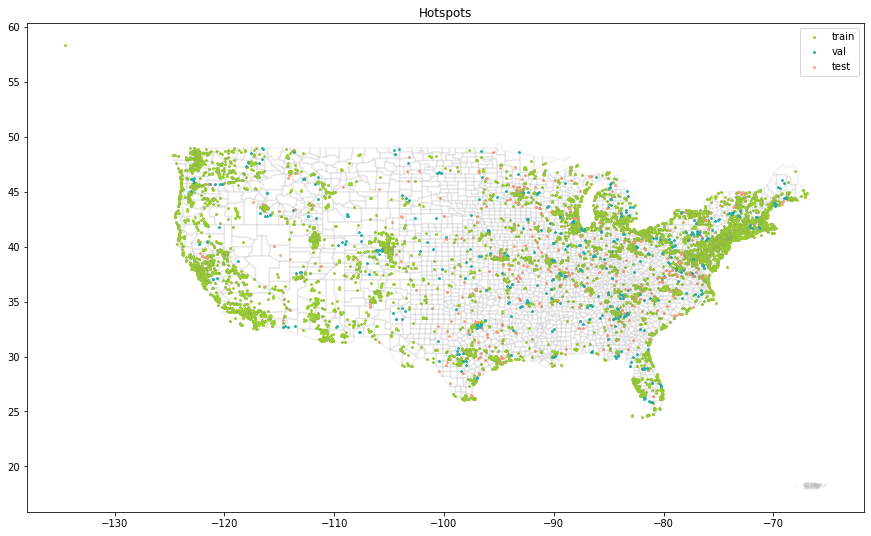

In [20]:
fig, ax = plt.subplots(figsize =(15,10))
#train_gdf.drop_duplicates(["geometry"]).boundary.plot(ax = ax, alpha = 0.4, edgecolor = "gray")
geoDatav[~geoDatav["STATE"].isin(["02", "15"])].boundary.plot(ax=ax, alpha = 0.1, edgecolor = "gray" )
gdf[gdf["split"]=="train"].plot(ax=ax,marker='*', color='yellowgreen', markersize=5, label = "train")
gdf[gdf["split"]=="val"].plot(ax=ax, marker='*', color='lightseagreen', markersize=5, label = "val")
gdf[gdf["split"]=="test"].plot(ax=ax, marker='*', color='lightsalmon', markersize=5, label = "test")

plt.legend()
plt.title("Hotspots")
plt.savefig("hotspots.png")
plt.show()



In [ ]:
#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [3]:
state = "US-CA"

In [4]:
subset = df[df["state_code"]==state]

In [145]:
len(subset)

1062

In [146]:
import glob
import os
import json 
import pandas as pd

datapath = "/network/scratch/t/tengmeli/ecosystem-embedding/satellite_data/"
species_data = "/network/scratch/t/tengmeli/ecosystem-embedding/ebird_data_june/"

#path of csv where we want to save info 
save_path = "/network/scratch/t/tengmeli/ecosystem-embedding/validation_files/california.csv"

keys = [os.path.basename(a).strip(".json") for a in glob.glob(species_data + "/*")]

hs_list = subset.hotspot_id.values

hs_list = list(dict.fromkeys(hs_list))
hs_list = [hs for hs in hs_list if hs in keys]

rgb_paths = [os.path.join(datapath, f"{hs}_rgb.npy") for hs in hs_list]
json_paths = [os.path.join(datapath, f"{hs}.json") for hs in hs_list]
nir_paths = [os.path.join(datapath, f"{hs}_ni.npy") for hs in hs_list]
r_paths = [os.path.join(datapath, f"{hs}_r.npy") for hs in hs_list]
g_paths = [os.path.join(datapath, f"{hs}_g.npy") for hs in hs_list]
b_paths = [os.path.join(datapath, f"{hs}_b.npy") for hs in hs_list]

species = [os.path.join(species_data, f"{hs}.json") for hs in hs_list]


dataset = pd.DataFrame(list(zip(hs_list, r_paths, g_paths, b_paths,nir_paths, json_paths, rgb_paths,
                                species,
                                )),

              columns=["hotspot", "r", "g", "b","nir", "meta", "rgb","species"])


dataset.to_csv(save_path)

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

%matplotlib inline

In [6]:
path = "/network/scratch/t/tengmeli/ecosystem-embedding/validation_files/california.csv"

In [149]:
from omegaconf import OmegaConf, DictConfig
from src.trainer.trainer import EbirdTask, EbirdDataModule
import pytorch_lightning as pl
from pytorch_lightning import loggers as pl_loggers
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import CometLogger
from pytorch_lightning.callbacks import EarlyStopping, ModelCheckpoint, LearningRateMonitor
from typing import Any, Dict, Tuple, Type, cast
from src.dataset.utils import set_data_paths
import pdb
import torch.nn as nn
from PIL import Image
import torch

In [150]:

conf = OmegaConf.load("/home/mila/t/tengmeli/ecosystem-embedding/configs/defaults.yaml")
config_fn = "/home/mila/t/tengmeli/ecosystem-embedding/configs/california.yaml"

if os.path.isfile(config_fn):
    user_conf = OmegaConf.load(config_fn)
    conf = OmegaConf.merge(conf, user_conf)
else:
    raise FileNotFoundError(f"config_file={config_fn} is not a valid file")

conf = set_data_paths(conf)
conf = cast(DictConfig, conf)  # convince mypy that everything is alright


In [151]:
def get_meta(df, index):
    meta = load_file(get_path(df, index, "meta"))
    return(meta)

def get_img(df, index):
    band_npy = load_file(get_path(df, index, "rgb"))
    return (band_npy)

def get_img(df, index, new_width = 256, new_height = 256):
    band_npy = load_file(get_path(df, index, "rgb"))
   
    im = Image.fromarray(np.transpose(band_npy, (1,2,0)))
    width, height = im.size   # Get dimensions

    left = (width - new_width)/2
    top = (height - new_height)/2
    right = (width + new_width)/2
    bottom = (height + new_height)/2

    # Crop the center of the image
    im = im.crop((left, top, right, bottom))
    return(im)

In [152]:
task = EbirdTask(conf)
datamodule = EbirdDataModule(conf)
trainer_args = cast(Dict[str, Any], OmegaConf.to_object(conf.trainer))

Training with BCE Loss


In [153]:
PATH = "/home/mila/t/tengmeli/ecosystem-embedding/ckpt/songbird_resnet18/last.ckpt"

state_dict = torch.load(PATH)["state_dict"]

for key in list(state_dict.keys()):
    state_dict[key.replace('model.', '')] = state_dict.pop(key)


task.model.load_state_dict(state_dict)
task.model.eval()
m = nn.Sigmoid()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [154]:
def infer(batch, model):
    x = batch['sat'].squeeze(1).to(device)
    y = batch['target'].to(device)
    y_hat = model(x)
    pred = m(y_hat)
    return(pred)

datamodule.setup()
test_dataloader = datamodule.val_dataloader()

/home/mila/t/tengmeli/.conda/envs/ebird-env/lib/python3.6/site-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [155]:
subset

,Unnamed: 0,hotspot_id,lon,lat,county,county_code,state,state_code,june_complete_checklists,num_checklists,num_complete_checklists,num_different_species
19,19,L2240252,-120.433674,39.832260,Plumas,US-CA-063,California,US-CA,16,248,211,147
31,31,L373858,-124.227980,40.645220,Humboldt,US-CA-023,California,US-CA,7,199,177,127
33,33,L1764908,-121.961481,37.433465,Santa Clara,US-CA-085,California,US-CA,33,1176,974,179
44,44,L9946491,-121.225700,38.678348,Sacramento,US-CA-067,California,US-CA,42,850,830,110
46,46,L278588,-116.309793,33.836986,Riverside,US-CA-065,California,US-CA,91,2618,2288,176
...,...,...,...,...,...,...,...,...,...,...,...,...
8625,8625,L917353,-117.690064,34.214065,Los Angeles,US-CA-037,California,US-CA,9,119,116,93
8627,8627,L791595,-121.155167,40.223976,Plumas,US-CA-063,California,US-CA,18,209,158,192
8630,8630,L589444,-119.862385,37.795542,Tuolumne,US-CA-109,California,US-CA,110,408,318,133
8633,8633,L2146581,-123.084710,39.002042,Mendocino,US-CA-045,California,US-CA,141,3013,2327,218


In [156]:
idx = 3

In [157]:
subset["ground_truth"] = ""
subset["pred"] = ""

/home/mila/t/tengmeli/.conda/envs/ebird-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/mila/t/tengmeli/.conda/envs/ebird-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [158]:
preds = []
hs= []
for batch in test_dataloader:
    pred = infer(batch, task.model)
    for n, i in enumerate(pred):
        row = subset[subset["hotspot_id"] == batch["hotspot_id"][n]].index.item()

        subset.loc[row,"pred"] = i[idx].item()
        subset.loc[row,"ground_truth"] =  batch["original_target"][n][idx].item()
        

/home/mila/t/tengmeli/.conda/envs/ebird-env/lib/python3.6/site-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/home/mila/t/tengmeli/.conda/envs/ebird-env/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [170]:
subset = subset[subset["ground_truth"]!='']

In [171]:
subset.to_csv("./california_pred.csv")

In [172]:
subset.head()

,Unnamed: 0,hotspot_id,lon,lat,county,county_code,state,state_code,june_complete_checklists,num_checklists,num_complete_checklists,num_different_species,ground_truth,pred
19,19,L2240252,-120.433674,39.832260,Plumas,US-CA-063,California,US-CA,16,248,211,147,0.75,0.272362
31,31,L373858,-124.227980,40.645220,Humboldt,US-CA-023,California,US-CA,7,199,177,127,0.714286,0.913363
33,33,L1764908,-121.961481,37.433465,Santa Clara,US-CA-085,California,US-CA,33,1176,974,179,0.212121,0.794723
44,44,L9946491,-121.225700,38.678348,Sacramento,US-CA-067,California,US-CA,42,850,830,110,0,0.323251
46,46,L278588,-116.309793,33.836986,Riverside,US-CA-065,California,US-CA,91,2618,2288,176,0,0.448659


In [173]:
ny = gpd.read_file(gpd.datasets.get_path('nybb'))


In [174]:
ny

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [175]:
ny = ny.to_crs(epsg=4326)

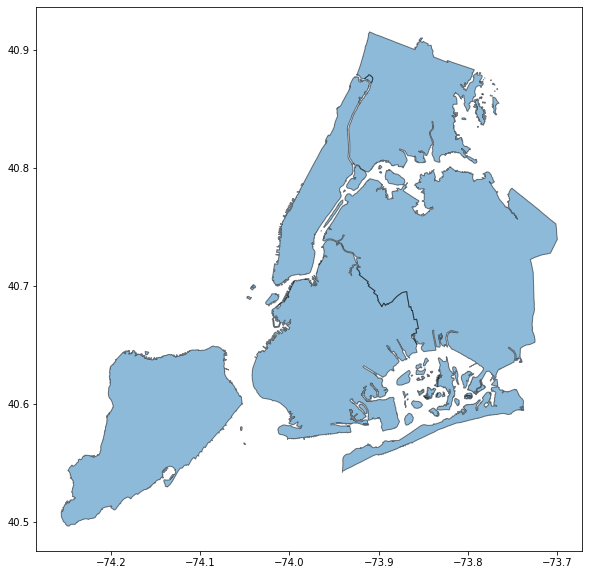

In [176]:
ax = ny.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

In [177]:
subset["county"].unique()

array(['Plumas', 'Humboldt', 'Santa Clara', 'Sacramento', 'Riverside',
       'Kern', 'Alameda', 'San Mateo', 'Los Angeles', 'San Bernardino',
       'Kings', 'Yolo', 'Mono', 'San Diego', 'Santa Barbara', 'Marin',
       'Alpine', 'Orange', 'San Luis Obispo', 'Nevada', 'Sonoma',
       'Monterey', 'Santa Cruz', 'Stanislaus', 'Madera', 'Del Norte',
       'San Francisco', 'Contra Costa', 'Inyo', 'Mendocino', 'Siskiyou',
       'Imperial', 'El Dorado', 'Ventura', 'San Joaquin', 'Butte', 'Lake',
       'Shasta', 'Fresno', 'Lassen', 'Amador', 'Placer', 'Solano', 'Napa',
       'Mariposa', 'San Benito', 'Sierra', 'Yuba', 'Tulare', 'Tuolumne',
       'Calaveras', 'Tehama', 'Modoc', 'Merced', 'Glenn', 'Colusa',
       'Sutter'], dtype=object)

In [178]:
subset_ny = subset[subset["county"].isin(['New York', 'Bronx', 'Queens'])]

In [197]:
a = (255*subset["ground_truth"].values).astype(np.uint8)
b = (255*subset["pred"].values).astype(np.uint8)

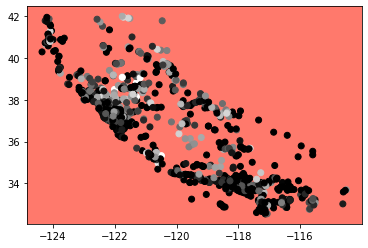

In [199]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_facecolor('xkcd:salmon')
plt.scatter(x=subset["lon"], y=subset["lat"],  c = a)
plt.gray()

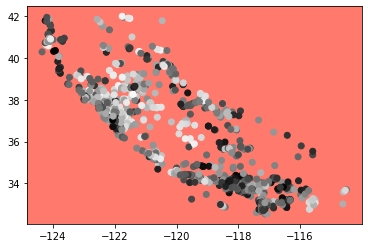

In [200]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_facecolor('xkcd:salmon')
plt.scatter(x=subset["lon"], y=subset["lat"],  c = b)
plt.gray()

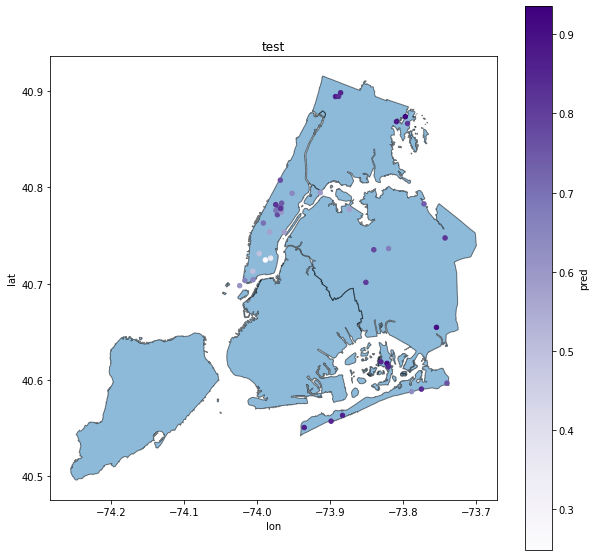

In [53]:
ax = ny.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

subset_ny.plot(x="lon", y="lat", kind="scatter", c = "pred", colormap="Purples", 
        title="test", 
        ax=ax)
plt.show()

In [22]:
ny.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich